In [258]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import random
import pygraphviz

In [259]:
# Using 414.edges, load and visualize data
el = open("./facebook/414.edges", "rb")
G = nx.read_edgelist(el, nodetype=int)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 150
Number of edges: 1693


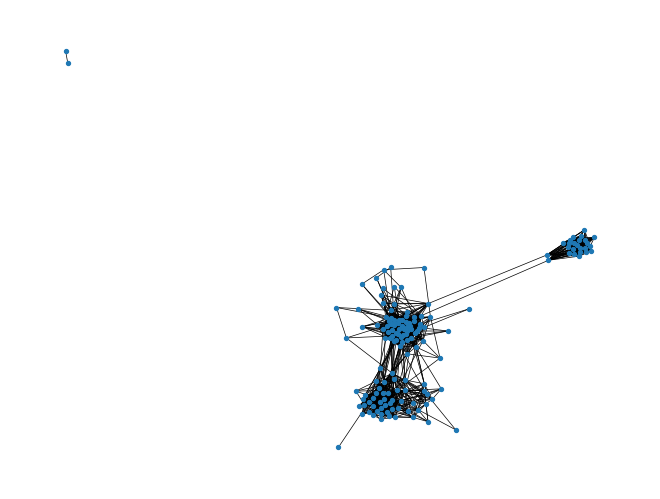

In [260]:
# Preliminary drawing of graph using NetworkX
nx.draw(G, node_size=8, with_labels=False, width=0.5)

In [261]:
# Better visualization of graph using GraphViz (stored in "graph414.jpg")
A = nx.nx_agraph.to_agraph(G)
A.graph_attr.update(size="10,10!") 
A.graph_attr.update(dpi="300") 
A.node_attr.update(width="0.5", height="0.5", shape="circle") 
A.graph_attr.update(overlap="false", splines="true")
A.edge_attr.update(len="2.0", penwidth="1.2")

A.draw("graph414.jpg", prog="neato")

In [262]:
# Calculate the degrees of each node
G.degree()

DegreeView({650: 21, 647: 18, 461: 34, 544: 34, 614: 31, 515: 32, 363: 31, 348: 45, 436: 44, 428: 48, 400: 42, 591: 45, 636: 24, 630: 38, 500: 35, 524: 39, 553: 43, 561: 39, 651: 28, 597: 21, 619: 25, 664: 16, 666: 17, 606: 26, 438: 42, 370: 37, 556: 25, 373: 53, 665: 17, 583: 24, 633: 14, 680: 26, 434: 20, 566: 39, 604: 34, 683: 32, 609: 29, 376: 57, 475: 44, 465: 38, 580: 31, 632: 21, 483: 47, 579: 38, 643: 23, 681: 22, 577: 21, 578: 23, 395: 39, 663: 8, 596: 18, 676: 17, 635: 21, 671: 4, 492: 43, 567: 33, 542: 29, 637: 31, 684: 19, 627: 23, 422: 34, 412: 43, 558: 8, 589: 20, 685: 16, 575: 11, 623: 16, 625: 20, 646: 12, 654: 32, 611: 15, 431: 34, 600: 23, 582: 20, 559: 45, 378: 43, 612: 14, 644: 24, 588: 13, 599: 22, 662: 23, 645: 28, 513: 49, 617: 24, 678: 25, 640: 22, 107: 12, 394: 21, 592: 40, 603: 17, 514: 29, 615: 23, 620: 19, 506: 38, 423: 38, 601: 16, 669: 33, 628: 11, 480: 3, 629: 5, 391: 35, 563: 27, 634: 15, 590: 13, 618: 23, 587: 9, 173: 4, 496: 23, 641: 18, 661: 23, 670: 

In [263]:
# Generate a sorted list of pairs (node, degree) for each node in the graph
degrees_dict = dict(G.degree())
degree_list = sorted(degrees_dict.items(), key=lambda x: x[1], reverse=True)
top_50 = degree_list[:50]
top_50

[(376, 57),
 (373, 53),
 (513, 49),
 (428, 48),
 (483, 47),
 (348, 45),
 (591, 45),
 (559, 45),
 (436, 44),
 (475, 44),
 (553, 43),
 (492, 43),
 (412, 43),
 (378, 43),
 (400, 42),
 (438, 42),
 (592, 40),
 (524, 39),
 (561, 39),
 (566, 39),
 (395, 39),
 (630, 38),
 (465, 38),
 (579, 38),
 (506, 38),
 (423, 38),
 (370, 37),
 (500, 35),
 (391, 35),
 (461, 34),
 (544, 34),
 (604, 34),
 (422, 34),
 (431, 34),
 (374, 34),
 (567, 33),
 (669, 33),
 (515, 32),
 (683, 32),
 (654, 32),
 (614, 31),
 (363, 31),
 (580, 31),
 (637, 31),
 (573, 31),
 (609, 29),
 (542, 29),
 (514, 29),
 (651, 28),
 (645, 28)]

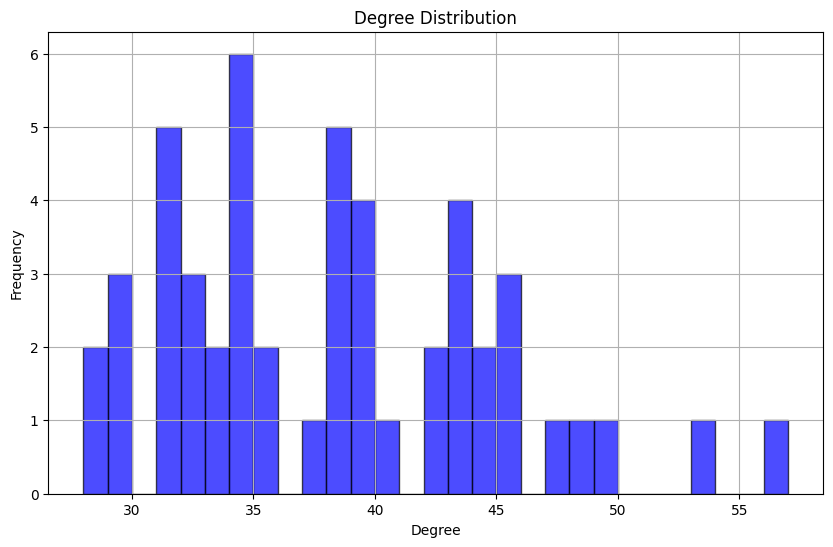

In [264]:
# Plot the degree distribution
degrees = [deg for node, deg in top_50]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='blue', alpha=0.7, edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [265]:
# Pick 5 random pairs of nodes from the entire network
nodes = [node for node, deg in degree_list]
random_pairs = random.sample([(nodes[i], nodes[j]) for i in range(len(degree_list)) for j in range(i+1, len(degree_list))], 5)
random_pairs

[(428, 583), (679, 427), (579, 363), (600, 620), (663, 649)]

In [266]:
# Calcluate the shortest path for each pair
shortest_paths = {}
for pair in random_pairs:
    shortest_paths[pair] = nx.shortest_path(G, source=pair[0], target=pair[1])
shortest_paths

{(428, 583): [428, 436, 635, 583],
 (679, 427): [679, 637, 496, 427],
 (579, 363): [579, 422, 348, 363],
 (600, 620): [600, 635, 436, 553, 620],
 (663, 649): [663, 596, 483, 107, 649]}

In [267]:
# Generate graphs with highlighted nodes along paths (stored in graph414_path#.jpg)
count = 0
for pair, path in shortest_paths.items():
    # Reset graphviz canvas
    A = nx.nx_agraph.to_agraph(G)
    A.graph_attr.update(size="10,10!")
    A.graph_attr.update(dpi="300")
    A.node_attr.update(width="0.5", height="0.5", shape="circle")
    A.graph_attr.update(overlap="false", splines="true")
    A.edge_attr.update(len="2.0", penwidth="1.2")
    source_node = pair[0] 
    target_node = pair[1] 

    # Highlight nodes in the shortest path
    for node in path:
        if node == source_node or node == target_node:
            A.get_node(node).attr.update(color="red", style="filled", fillcolor="yellow")
        else: 
            A.get_node(node).attr.update(color="red", style="filled", fillcolor="lightblue")

    # Highlight edges in the shortest path
    edges_in_path = list(zip(path[:-1], path[1:])) 
    for edge in edges_in_path:
        A.get_edge(edge[0], edge[1]).attr.update(color="red", penwidth="5.0")

    filename = (f'graph414_path{count}.jpg')
    A.draw(filename, prog="neato")
    count += 1

In [271]:
# Find nodes in each path with degree values above the threshold (100)
threshold = 42
high_deg_nodes = []
for pair, path in shortest_paths.items():
    for node in path:
        if degrees_dict[node] > threshold:
            high_deg_nodes.append(node)
high_deg_nodes

[428, 436, 348, 436, 553, 483]

In [272]:
# Generate graphs with highlighted high-degree nodes (stored in graph414_path#_highdegree.jpg)
count = 0
for pair, path in shortest_paths.items():
    # Reset graphviz canvas
    A = nx.nx_agraph.to_agraph(G)
    A.graph_attr.update(size="10,10!")
    A.graph_attr.update(dpi="300")
    A.node_attr.update(width="0.5", height="0.5", shape="circle")
    A.graph_attr.update(overlap="false", splines="true")
    A.edge_attr.update(len="2.0", penwidth="1.2")
    source_node = pair[0] 
    target_node = pair[1] 

    # Highlight nodes in the shortest path
    for node in path:
        if node == source_node or node == target_node:
            A.get_node(node).attr.update(color="red", style="filled", fillcolor="yellow")
        elif (node in high_deg_nodes):
            A.get_node(node).attr.update(color="red", style="filled", fillcolor="green")
        else: 
            A.get_node(node).attr.update(color="red", style="filled", fillcolor="lightblue")

    # Highlight edges in the shortest path
    edges_in_path = list(zip(path[:-1], path[1:])) 
    for edge in edges_in_path:
        A.get_edge(edge[0], edge[1]).attr.update(color="red", penwidth="5.0")

    filename = (f'graph414_path{count}_highdegree.jpg')
    A.draw(filename, prog="neato")
    count += 1
